<a href="https://colab.research.google.com/github/Tobsam237/FIFA19_ExpoAnalysisOnNigeriansPlayers/blob/master/Fifa19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi guys, here is an analysis on fifa19 dataset.
Using Regression Analysis, let's predict  players Overall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#fifa19_data = files.upload()

In [3]:
df= pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Data undestanding and cleaning

In [4]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
df= df.rename(columns={"Loaned From":"Loaned_From"})

In [7]:
df.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [8]:
df.Loaned_From.isnull().sum()

16943

In [9]:
df=df.drop('Loaned_From', axis=1)

In [10]:
df.shape

(18207, 88)

In [11]:
df= df.dropna()
df.shape

(14743, 88)

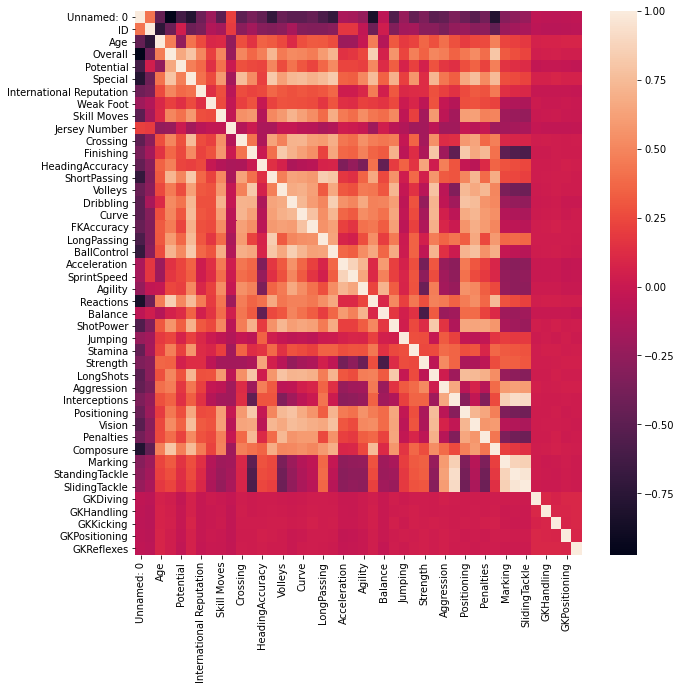

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), )


<BarContainer object of 40 artists>

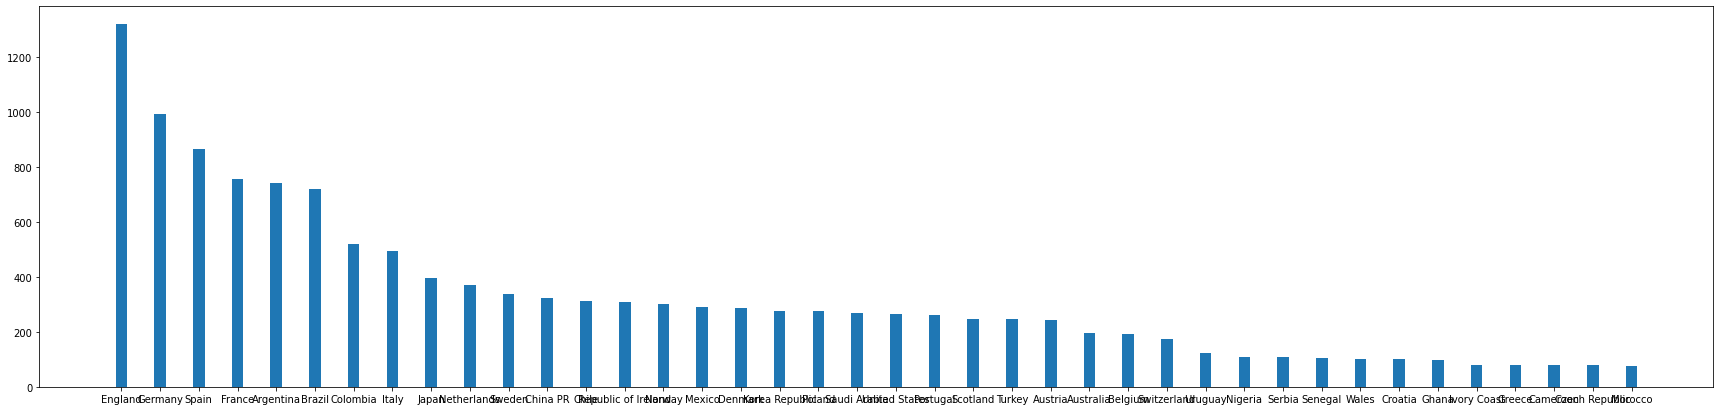

In [13]:
#Comparative Vizualiztion of players count by top 40 nationalities
plt.figure(figsize=(30,7))
plt.bar(df.groupby('Nationality')['ID'].count().sort_values(ascending = False).head(40).index, df.groupby('Nationality')['ID'].count().sort_values(ascending=False).head(40), width=0.3)

In [14]:
df.Nationality.value_counts()[:35]
#Total number of players counts by nationality

England                1320
Germany                 993
Spain                   866
France                  757
Argentina               741
Brazil                  721
Colombia                520
Italy                   493
Japan                   395
Netherlands             372
Sweden                  339
China PR                325
Chile                   312
Republic of Ireland     308
Norway                  302
Mexico                  289
Denmark                 288
Korea Republic          275
Poland                  275
Saudi Arabia            267
United States           265
Portugal                263
Scotland                248
Turkey                  246
Austria                 244
Australia               196
Belgium                 193
Switzerland             175
Uruguay                 122
Nigeria                 109
Serbia                  109
Senegal                 106
Wales                   102
Croatia                 101
Ghana                    98
Name: Nationality, d

Text(0.5, 1.0, 'By Nationality')

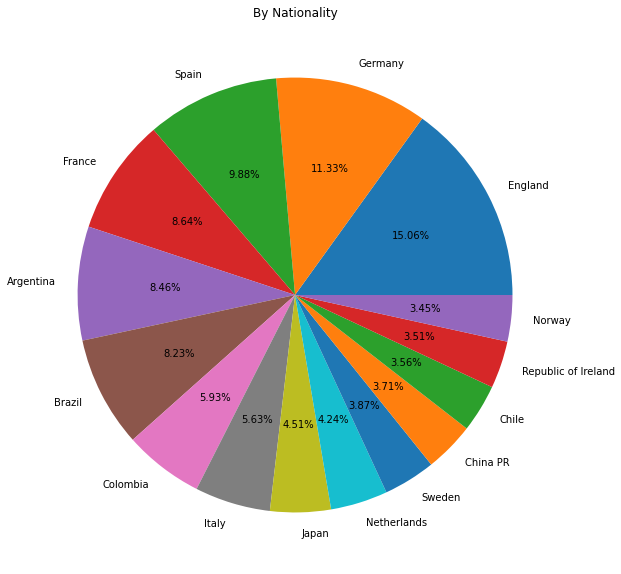

In [15]:
plt.figure(figsize=(10,10))
plt.pie(df.Nationality.value_counts()[:15], labels= df.Nationality.value_counts()[:15].index, autopct='%1.2f%%', )
plt.title("By Nationality")

In [16]:
#sns.pairplot(df_Nig)

Data Exploratory on Team NIGERIA

In [17]:
df_Nig = df[df['Nationality']== 'Nigeria']
df_Nig.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,109.000000,109.00000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,8468.477064,222864.12844,23.302752,66.917431,73.247706,1666.605505,1.045872,2.990826,2.651376,25.385321,51.587156,53.770642,58.155963,60.532110,50.174312,64.660550,48.357798,40.486239,51.284404,64.788991,75.339450,75.788991,69.486239,62.064220,67.807339,63.009174,68.091743,69.330275,69.697248,53.596330,58.834862,41.541284,57.724771,54.00000,53.211009,60.064220,43.688073,44.165138,41.743119,10.504587,10.633028,10.798165,10.972477,10.779817
std,4830.646609,21691.10417,3.473456,5.837504,5.490996,172.265623,0.210173,0.552694,0.614277,19.951751,13.317498,16.048326,10.481177,9.117107,13.724703,10.182792,11.664701,11.072668,11.614241,8.134373,10.142704,9.247696,12.842792,8.301356,13.131442,11.295275,13.046598,9.677250,12.020434,13.306305,14.584691,20.859997,13.899022,10.76517,11.052127,8.781583,18.499598,21.004635,20.712496,3.155313,3.178809,2.761440,3.071550,2.900695
min,425.000000,146011.00000,17.000000,48.000000,61.000000,1286.000000,1.000000,2.000000,2.000000,3.000000,27.000000,19.000000,32.000000,37.000000,20.000000,33.000000,23.000000,21.000000,20.000000,41.000000,46.000000,45.000000,32.000000,39.000000,35.000000,31.000000,30.000000,37.000000,34.000000,19.000000,26.000000,13.000000,16.000000,30.00000,29.000000,42.000000,13.000000,12.000000,11.000000,5.000000,5.000000,6.000000,6.000000,6.000000
25%,4410.000000,211048.00000,21.000000,63.000000,69.000000,1546.000000,1.000000,3.000000,2.000000,12.000000,41.000000,40.000000,53.000000,54.000000,39.000000,59.000000,41.000000,32.000000,44.000000,61.000000,68.000000,69.000000,61.000000,56.000000,60.000000,57.000000,62.000000,64.000000,62.000000,45.000000,48.000000,22.000000,51.000000,46.00000,46.000000,53.000000,28.000000,25.000000,23.000000,8.000000,8.000000,9.000000,8.000000,8.000000
50%,8573.000000,229023.00000,23.000000,67.000000,73.000000,1657.000000,1.000000,3.000000,3.000000,20.000000,52.000000,59.000000,59.000000,61.000000,51.000000,65.000000,48.000000,38.000000,52.000000,65.000000,74.000000,76.000000,70.000000,61.000000,68.000000,64.000000,69.000000,69.000000,72.000000,56.000000,62.000000,35.000000,60.000000,54.00000,54.000000,61.000000,39.000000,41.000000,36.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,12619.000000,240914.00000,25.000000,71.000000,77.000000,1787.000000,1.000000,3.000000,3.000000,32.000000,63.000000,66.000000,66.000000,67.000000,62.000000,72.000000,57.000000,47.000000,60.000000,69.000000,83.000000,83.000000,79.000000,67.000000,77.000000,71.000000,76.000000,75.000000,78.000000,63.000000,69.000000,62.000000,68.000000,63.00000,62.000000,66.000000,60.000000,65.000000,62.000000,13.000000,13.000000,13.000000,14.000000,13.000000
max,18174.000000,246172.00000,34.000000,80.000000,85.000000,2110.000000,2.000000,5.000000,4.000000,99.000000,76.000000,77.000000,81.000000,81.000000,77.000000,84.000000,75.000000,71.000000,74.000000,84.000000,95.000000,93.000000,92.000000,82.000000,93.000000,83.000000,93.000000,93.000000,93.000000,77.000000,86.000000,84.000000,84.000000,80.00000,75.000000,82.000000,84.000000,84.000000,83.

109 players from Nigeria.
minimum Age is 17
max age is 34
Mean and median of overall of 109 players is 73.25 and 67.00 rspectively

Next, we extract the top 25 players for the the coaches to invite for international duties based on overall and potemtial.


In [18]:
df_Nig25= df_Nig[['Name', 'Age', 'Overall', 'Potential', 'Position', 'Club', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']].head(25)
df_Nig25[['Name', 'Age', 'Overall', 'Potential']]
# Best Nigeria Players by 'Overall' feature. These ones should be on the international team.

,Name,Age,Overall,Potential
425,W. Ndidi,21,80,85
789,A. Iwobi,22,78,84
858,V. Moses,27,78,78
1022,O. Ighalo,29,77,77
1531,A. Umar,23,76,81
1550,M. Simon,22,76,82
1615,L. Balogun,30,75,75
1754,A. Musa,25,75,77
1942,O. Onazi,25,75,78
1946,K. Iheanacho,21,75,83


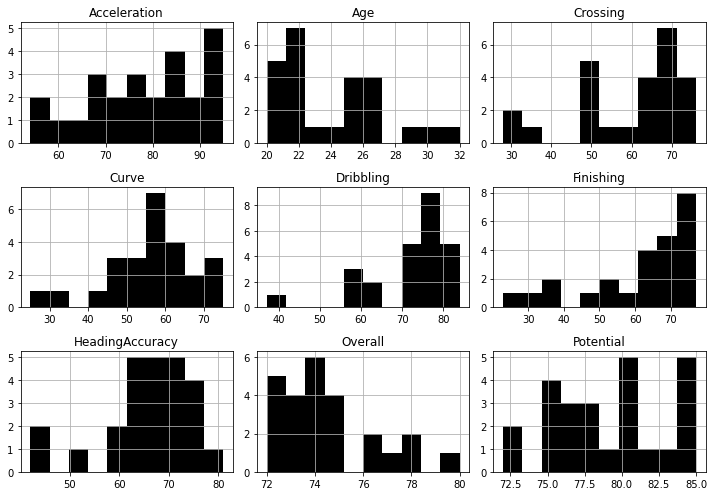

In [19]:
df_Nig25[['Age', 'Overall', 'Potential', 'Dribbling', 'Finishing', 'Crossing', 'HeadingAccuracy', 'Curve', 'Acceleration']].hist(figsize=(10,7), color ='k' )
plt.tight_layout()
#Age Skewed to right, most are quite young so, high resiliency in team
#Finishing skewed, the team quite good near the goal post
#Overall skewed to left, thus not worldclass players.

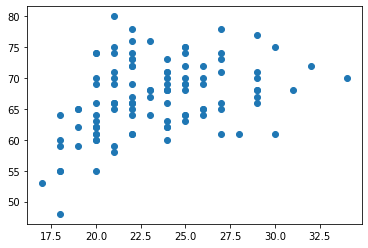

In [20]:
plt.scatter(df_Nig['Age'], df_Nig['Overall'])
#shows the best players in team Nig are above 21years of age

In [21]:
(df_Nig.groupby(['Preferred Foot'])['Name'].count())
#We have 13 left legged Nigerian players and 96 rightlegged Nigerian players

Preferred Foot
Left     13
Right    96
Name: Name, dtype: int64

In [22]:
#fastest players on team Nigeria are MUSA, EJUKE, OMOH
df_NigFast=df_Nig[['Name', 'Acceleration']].sort_values('Acceleration', ascending=False)
df_NigFast.head()

,Name,Acceleration
1754,A. Musa,95.0
9779,C. Ejuke,93.0
10199,M. Omoh,93.0
1550,M. Simon,93.0
2431,E. Dennis,93.0


In [23]:
#strongest players on team Nigeria are MATTHEW, NDIDI, OLAYINKA 
df_Nig[['Name', 'Stamina']].sort_values('Stamina', ascending=False).head(3)

,Name,Stamina
5641,I. Mathew,93.0
425,W. Ndidi,92.0
3883,P. Olayinka,91.0


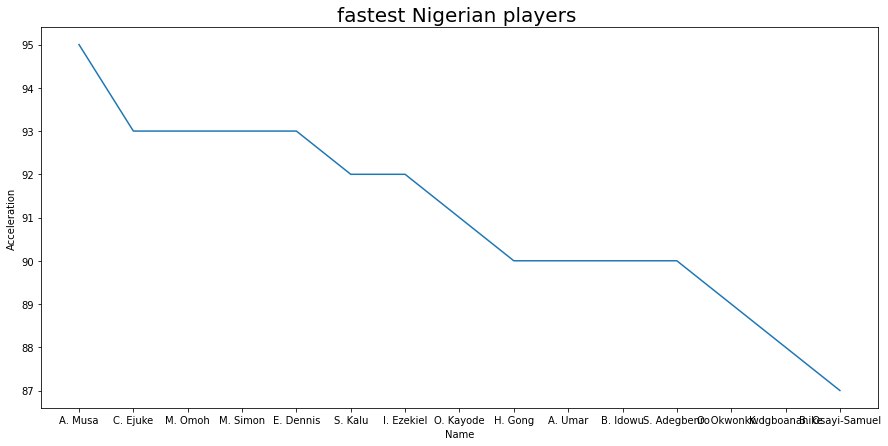

In [24]:

plt.figure(figsize=(15, 7))
plt.plot(df_NigFast.head(15)["Name"],df_NigFast.head(15)["Acceleration"])
plt.ylabel("Acceleration")
plt.xlabel("Name")

plt.title("fastest Nigerian players ", fontsize = 20)
plt.show()
#visualizes acceleration differences among fastest Nigerian players

We could go on exploring and having fun with these data.
Next, we build a regression modek t0 predict the overall score of a player.


The goal of the regression analysis is to understand the training best suited to players as a coach to help overall quality of players.

We will trian our model based off all teams and test our models on Nigerian team.

In [25]:
df1= df[['Name', 'Age', 'Overall', 'Potential', 'Position', 'Club', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]
#df1.shape
df1.head()

,Name,Age,Overall,Potential,Position,Club,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,RF,FC Barcelona,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,94,94,ST,Juventus,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,92,93,LW,Paris Saint-Germain,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,K. De Bruyne,27,91,92,RCM,Manchester City,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,E. Hazard,27,91,91,LF,Chelsea,2142,4.0,4.0,4.0,10.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [26]:
df1.isna().sum().sum()

0

In [27]:
#'Overall' is our y
#df.drop overall is our x 

# df. drop Nigeria team is our train 
#df. Nig team is or test... 

In [28]:
#Drop unnecessary cokums and One Hot Encode other catgorical variables
df2 = pd.get_dummies(df1.drop('Name', axis=1))


In [29]:
#split dataset to independent and dependent datasets
x= df2.drop('Overall', axis=1)
y= df2.Overall

In [30]:
#We training the whole dataset for testing on Nigerian Team, we dont need the random selctive train_test_split clasiifier

x_train = x.drop(index= df_Nig.index)
y_train= y.drop(index= df_Nig.index)

x_test = df2.loc[df_Nig.index].drop('Overall', axis=1)
y_test = df2.loc[df_Nig.index].Overall

In [31]:
#We are ready to biuld our Linear Regression model

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.9417364472983903

Before we stop at Linear regression, let us explore some other Regressors
and see which has the lowest Root Mean Square Error to help our accuracy.

NB: With the help of Collab GPU, machine time is fair.


Got concept from **Mehmet Sungur's "House Price All regressor Algothim"**. Thanks   

---



In [36]:
from sklearn.utils.testing import all_estimators
from sklearn import base

estimators = all_estimators()

for name, class_ in estimators:
    if issubclass(class_, base.RegressorMixin):
        print(name+"()")

ARDRegression()
AdaBoostRegressor()
BaggingRegressor()
BayesianRidge()
CCA()
DecisionTreeRegressor()
DummyRegressor()
ElasticNet()
ElasticNetCV()
ExtraTreeRegressor()
ExtraTreesRegressor()
GaussianProcessRegressor()
GradientBoostingRegressor()
HistGradientBoostingRegressor()
HuberRegressor()
IsotonicRegression()
KNeighborsRegressor()
KernelRidge()
Lars()
LarsCV()
Lasso()
LassoCV()
LassoLars()
LassoLarsCV()
LassoLarsIC()
LinearRegression()
LinearSVR()
MLPRegressor()
MultiOutputRegressor()
MultiTaskElasticNet()
MultiTaskElasticNetCV()
MultiTaskLasso()
MultiTaskLassoCV()
NuSVR()
OrthogonalMatchingPursuit()
OrthogonalMatchingPursuitCV()
PLSCanonical()
PLSRegression()
PassiveAggressiveRegressor()
RANSACRegressor()
RadiusNeighborsRegressor()
RandomForestRegressor()
RegressorChain()
Ridge()
RidgeCV()
SGDRegressor()
SVR()
StackingRegressor()
TheilSenRegressor()
TransformedTargetRegressor()
VotingRegressor()
_SigmoidCalibration()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [37]:
n_r=0.6 
r_s=42 
np.random.seed(seed=r_s)

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.linear_model import Ridge,RidgeCV,BayesianRidge,LinearRegression,Lasso,LassoCV,ElasticNet,RANSACRegressor,HuberRegressor,PassiveAggressiveRegressor,ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import CCA
from sklearn.neural_network import MLPRegressor



my_regressors=[ 
               ElasticNet(alpha=0.001,l1_ratio=0.70,max_iter=100,tol=0.01, random_state=r_s),
               ElasticNetCV(l1_ratio=0.9,max_iter=100,tol=0.01,random_state=r_s),
               #GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber',random_state =r_s),
               #RandomForestRegressor(random_state=r_s),
               AdaBoostRegressor(random_state=r_s),
               #ExtraTreesRegressor(random_state=r_s),
               #SVR(C= 20, epsilon= 0.008, gamma=0.0003),
               Ridge(alpha=6),
               RidgeCV(),
               BayesianRidge(),
               DecisionTreeRegressor(),
               LinearRegression(),
               KNeighborsRegressor(),
               Lasso(alpha=0.00047,random_state=r_s),
               LassoCV(),
               #KernelRidge(),
               CCA(),
               MLPRegressor(random_state=r_s),
               HistGradientBoostingRegressor(random_state=r_s),
               HuberRegressor(),
               RANSACRegressor(random_state=r_s),
               PassiveAggressiveRegressor(random_state=r_s)
               #XGBRegressor(random_state=r_s)
              ]

regressors=[]

for my_regressor in my_regressors:
    regressors.append(my_regressor)


scores_val=[]
scores_train=[]
MAE=[]
MSE=[]
RMSE=[]


for regressor in regressors:
    scores_val.append(regressor.fit(x_train,y_train).score(x_test,y_test))
    scores_train.append(regressor.fit(x_train,y_train).score(x_train,y_train))
    y_pred=regressor.predict(x_test)
    MAE.append(mean_absolute_error(y_test,y_pred))
    MSE.append(mean_squared_error(y_test,y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

    
results=zip(scores_val,scores_train,MAE,MSE,RMSE)
results=list(results)
results_score_val=[item[0] for item in results]
results_score_train=[item[1] for item in results]
results_MAE=[item[2] for item in results]
results_MSE=[item[3] for item in results]
results_RMSE=[item[4] for item in results]


df_results=pd.DataFrame({"Algorithms":my_regressors,"Training Score":results_score_train,"Validation Score":results_score_val,"MAE":results_MAE,"MSE":results_MSE,"RMSE":results_RMSE})
df_results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19949.89801486022, tolerance: 6961.140399754005
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19949.89801486022, tolerance: 6961.140399754005
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19622.077893759717, tolerance: 69.61140399754005
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19622.07789

,Algorithms,Training Score,Validation Score,MAE,MSE,RMSE
0,"ElasticNet(alpha=0.001, copy_X=True, fit_inter...",0.944233,0.938159,1.167173,2.088004,1.444993
1,"ElasticNetCV(alphas=None, copy_X=True, cv=None...",0.917309,0.902925,1.436979,3.277607,1.810416
2,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.925392,0.889473,1.580596,3.731816,1.931791
3,"Ridge(alpha=6, copy_X=True, fit_intercept=True...",0.947546,0.941517,1.148849,1.974602,1.405205
4,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N...",0.947071,0.941130,1.149634,1.987662,1.409845
5,"BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, al...",0.946884,0.940972,1.149828,1.993006,1.411739
6,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",1.000000,0.885062,1.477064,4.467890,2.113738
7,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.947775,0.941736,1.153514,1.967200,1.402569
8,"KNeighborsRegressor(algorithm='auto', leaf_siz...",0.958675,0.907485,1.372477,3.123670,1.767391
9,"Lasso(alpha=0.00047, copy_X=True, fit_intercep...",0.946095,0.940534,1.146057,2.007785,1.416963


In [47]:
ranked_models = df_results.sort_values(by="RMSE")
ranked_models

,Algorithms,Training Score,Validation Score,MAE,MSE,RMSE
13,HistGradientBoostingRegressor(l2_regularizatio...,0.990257,0.974168,0.710018,0.872189,0.933911
12,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.981014,0.971473,0.798456,0.963191,0.981423
7,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.947775,0.941736,1.153514,1.967200,1.402569
3,"Ridge(alpha=6, copy_X=True, fit_intercept=True...",0.947546,0.941517,1.148849,1.974602,1.405205
4,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N...",0.947071,0.941130,1.149634,1.987662,1.409845
5,"BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, al...",0.946884,0.940972,1.149828,1.993006,1.411739
9,"Lasso(alpha=0.00047, copy_X=True, fit_intercep...",0.946095,0.940534,1.146057,2.007785,1.416963
0,"ElasticNet(alpha=0.001, copy_X=True, fit_inter...",0.944233,0.938159,1.167173,2.088004,1.444993
15,"RANSACRegressor(base_estimator=None, is_data_v...",0.944524,0.934034,1.222284,2.227277,1.492406
8,"KNeighborsRegressor(algorithm='auto', leaf_siz...",0.958675,0.907485,1.372477,3.123670,1.767391


The best Regressor Model seems to be HistGradientBoostingRegressor with a Test Accuracy of 99% and RMSE value of 0.9339


So, lets see how its predictions fare with the actual values on test data

In [49]:
best_model = ranked_models.iloc[0][0]
y_pred = best_model.predict(x_test)

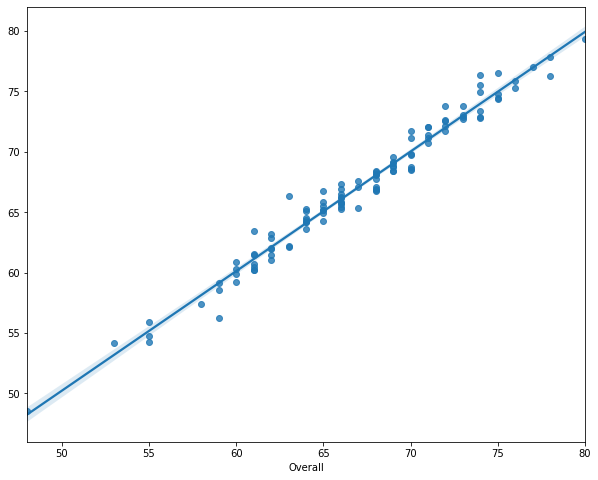

In [51]:
plt.figure(figsize=(10,8))
sns.regplot(y_test, y_pred)

We could explore and analyze other teams by Clubs or Nationality